# Flare 
Event#	EName	Start	Stop	Peak	GOES Class	Derived Position
1	gev_20220626_0800	2022/06/26 08:00:00	08:20:00	08:12:00	C2.4	S12E09 ( 3040 )

Event#	EName	Start	Stop	Peak	GOES Class	Derived Position
1	gev_20220626_0744	2022/06/26 07:44:00	07:55:00	07:50:00	C1.9	S14E10 ( 3040 )


In [6]:
import numpy as np
# import copy
# import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
# import sunpy
# from scipy.io import readsav
# import cocopy as cp
from ISPy.io import solarnet
# import sunpy.map
# import astropy.units as u
# from scipy.io import readsav as rs
# from PIL import Image, ImageEnhance
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
# import datetime as dt
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from matplotlib.collections import PolyCollection
import sys
sys.path.append('E:/solar flares/data/2017-09-06')
import use_nessi3 as un

E:\solar flares/data/2017-09-06\use_nessi.py:309: SyntaxWarning: invalid escape sequence '\A'
  da.plot_fit(data, model=model_atlas, theta0=mini['x'], titel="Fitting atlas to nessi ",labelx=" $wavelength [\AA]$",
E:\solar flares/data/2017-09-06\use_nessi.py:980: SyntaxWarning: invalid escape sequence '\A'
  da.plot_fit(data, model=f_nessi_clv, theta0=mini['x'], titel="fitting Nessi to sst data ",labelx=" $wavelength [\AA]$",
E:\solar flares/data/2017-09-06\use_nessi.py:1730: SyntaxWarning: invalid escape sequence '\D'
  print(f'The maximal signal to noise ratio for the {criterion} criterion is if the interval is of width $\Delta x={Deltas[i]}\AA$.')
E:\solar flares/data/2017-09-06\use_nessi.py:1730: SyntaxWarning: invalid escape sequence '\A'
  print(f'The maximal signal to noise ratio for the {criterion} criterion is if the interval is of width $\Delta x={Deltas[i]}\AA$.')
E:\solar flares/data/2017-09-06\use_nessi.py:1985: SyntaxWarning: invalid escape sequence '\s'
  return "E:\solar

In [7]:
import os

# Specify the path to the folder you want to list files from
folder_path = "C:\\Users\Gebruiker\Documents\school\solar flares2\data not on the disk\\nb_6563_2022-06-26T07_36_24_clipped=0-119.icube"

maximum = 1000 # to be determined 


from ISPy.io import lapalma as lp

cube = lp.read(folder_path , 31)


def timeframe_to_filename_fits(frame):
    if frame <0 or frame > maximum:
        raise IndexError(f'frame number {frame} is not in [0, {max}).')
    else:
        return folder_path
ttff = timeframe_to_filename_fits


def alternative_datacube(timeframe):
    if timeframe >= maximum or timeframe < 0:
        raise IndexError(f"Timeframe {timeframe} is negative or exeeds numer of frames {maximum}.")
    return cube[timeframe, 0]

<>:4: SyntaxWarning: invalid escape sequence '\G'
<>:4: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_18344\4020538470.py:4: SyntaxWarning: invalid escape sequence '\G'
  folder_path = "C:\\Users\Gebruiker\Documents\school\solar flares2\data not on the disk\\nb_6563_2022-06-26T07_36_24_clipped=0-119.icube"


In [8]:
print(cube.shape)
maximum = cube.shape[0]

(120, 1, 31, 1283, 1278)


In [9]:
from scipy.io import readsav as rs
spec_file = "C:\\Users\Gebruiker\Documents\school\solar flares2\data not on the disk\\nb_6563_2022-06-26T07_36_24_07_36_24=0-189_corrected_im_times+wvl.idlsave"

X = rs(spec_file)
tlist = X['times']
tlist = [ str(f)[2:] for f in tlist][:maximum]
wav = X['lambda'] * 10
pos = (X['xcent0'], X['ycent0'])


<>:2: SyntaxWarning: invalid escape sequence '\G'
<>:2: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_18344\3809338980.py:2: SyntaxWarning: invalid escape sequence '\G'
  spec_file = "C:\\Users\Gebruiker\Documents\school\solar flares2\data not on the disk\\nb_6563_2022-06-26T07_36_24_07_36_24=0-189_corrected_im_times+wvl.idlsave"


In [10]:
np.save('line_data/wav_sstHa.npy', wav)

In [11]:
pos, len(wav), wav

((-180.38424619869008, -203.16429455784942),
 31,
 array([6561.31120982, 6561.41120982, 6561.51120982, 6561.61120982,
        6561.71120982, 6561.81120982, 6561.91120982, 6562.01120982,
        6562.11120982, 6562.21120982, 6562.31120982, 6562.41120982,
        6562.51120982, 6562.61120982, 6562.71120982, 6562.81120982,
        6562.91120982, 6563.01120982, 6563.11120982, 6563.21120982,
        6563.31120982, 6563.41120982, 6563.51120982, 6563.61120982,
        6563.71120982, 6563.81120982, 6563.91120982, 6564.01120982,
        6564.11120982, 6564.21120982, 6564.31120982]))

In [12]:
len(tlist), tlist

(120,
 ["07:37:02.124'",
  "07:37:42.394'",
  "07:38:22.664'",
  "07:39:02.933'",
  "07:39:43.231'",
  "07:40:23.506'",
  "07:41:03.779'",
  "07:41:44.102'",
  "07:42:24.369'",
  "07:43:04.632'",
  "07:43:44.900'",
  "07:44:25.167'",
  "07:45:05.438'",
  "07:45:45.713'",
  "07:46:25.981'",
  "07:47:06.273'",
  "07:47:46.541'",
  "07:48:26.837'",
  "07:49:07.108'",
  "07:49:47.378'",
  "07:50:27.650'",
  "07:51:07.924'",
  "07:51:48.222'",
  "07:52:28.520'",
  "07:53:08.818'",
  "07:53:49.090'",
  "07:54:29.392'",
  "07:55:09.664'",
  "07:55:49.969'",
  "07:56:30.302'",
  "07:57:10.575'",
  "07:57:50.850'",
  "07:58:31.181'",
  "07:59:11.452'",
  "07:59:51.755'",
  "08:00:32.028'",
  "08:01:12.301'",
  "08:01:52.601'",
  "08:02:32.928'",
  "08:03:13.228'",
  "08:03:53.502'",
  "08:04:33.801'",
  "08:05:14.071'",
  "08:05:54.367'",
  "08:06:34.669'",
  "08:07:14.940'",
  "08:07:55.212'",
  "08:08:35.541'",
  "08:09:15.839'",
  "08:09:56.135'",
  "08:10:36.433'",
  "08:11:16.736'",
  "08:

C:\Users\Gebruiker\Documents\school\solar flares2\data not on the disk\nb_6563_2022-06-26T07_36_24_clipped=0-119.icube
s=(31, 1283, 1278)
the shape of the data is (120, '??', 31, 1283, 1278)
the wavelengths are self._wavel = array([6561.31120982, 6561.41120982, 6561.51120982, 6561.61120982,
       6561.71120982, 6561.81120982, 6561.91120982, 6562.01120982,
       6562.11120982, 6562.21120982, 6562.31120982, 6562.41120982,
       6562.51120982, 6562.61120982, 6562.71120982, 6562.81120982,
       6562.91120982, 6563.01120982, 6563.11120982, 6563.21120982,
       6563.31120982, 6563.41120982, 6563.51120982, 6563.61120982,
       6563.71120982, 6563.81120982, 6563.91120982, 6564.01120982,
       6564.11120982, 6564.21120982, 6564.31120982])
Use arguments as dictionary with 'frames_of_overlap' to define a list of considerd frames to calculate overlap
calculated boundary at frame 0


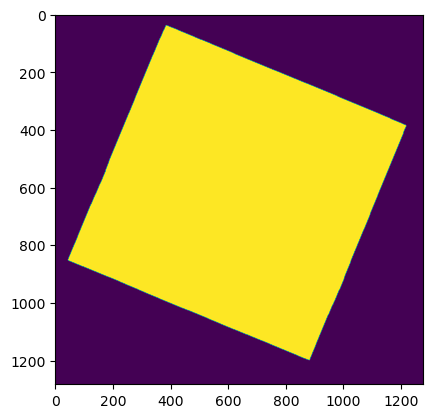

calculated boundary at frame 15


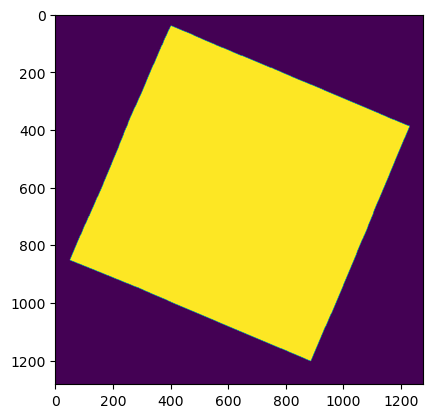

calculated boundary at frame 30


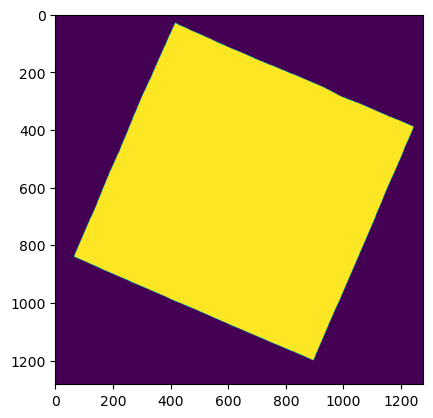

calculated boundary at frame 45


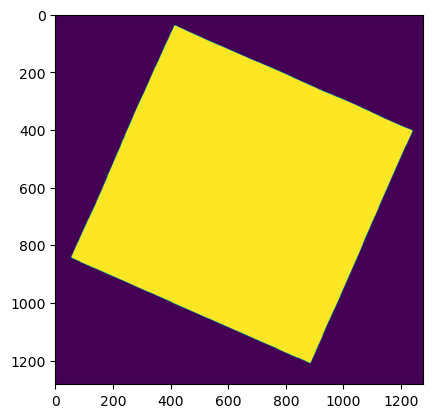

calculated boundary at frame 60


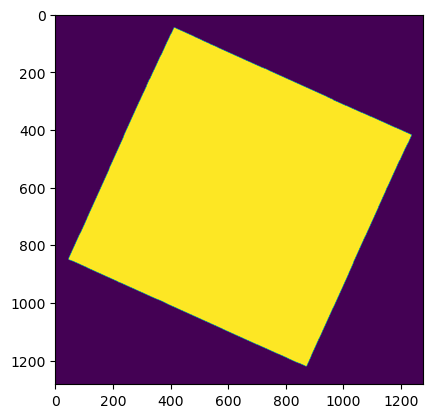

calculated boundary at frame 75


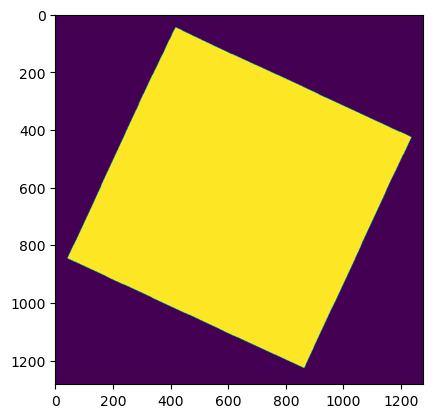

calculated boundary at frame 90


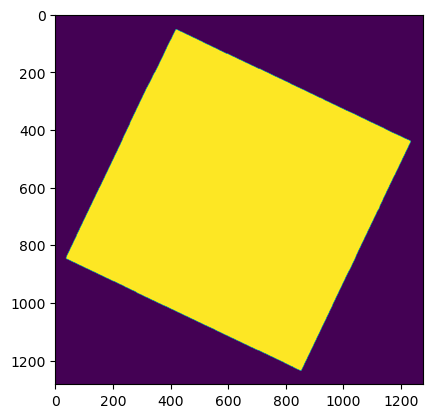

calculated boundary at frame 105


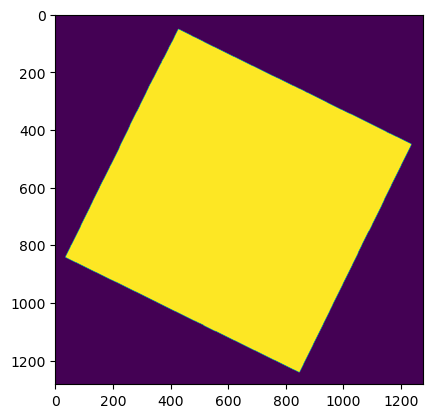

calculated boundary over folowing frames range(0, 120, 15)
(1283, 1278) (1283, 1278)
Boundary
Blue=Outside, yellow=Inside


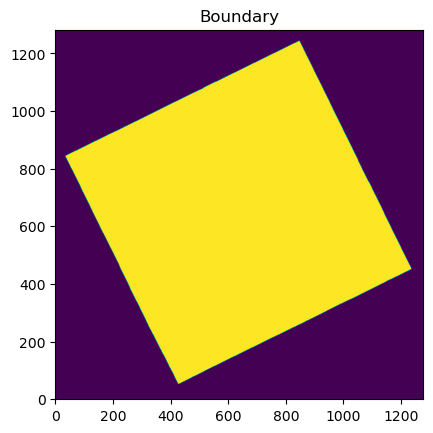

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
reload(un)


Ha = un.SST_data_from_multiple_fits_files(
    timeframe_to_filename_fits,
    spectfilename='line_data/wav_sstHa.npy', 
    number_of_frames=maximum,
    time=tlist, name_of_line='Ha22a', 
    thresh=[0, np.percentile(alternative_datacube(0), 99.5)],  
    boundary_methode='search_overlap', 
    boundary_arguments = {"error":0.01}, 
    with_stokes=True, 
    with_time=True, 
    alternative_datacube=alternative_datacube
    )

Ha.boundary


In [14]:
# Haalculate__FOV_spect_over_time()
reload(un)

<module 'use_nessi3' from 'E:\\solar flares/data/2017-09-06\\use_nessi3.py'>

In [15]:
secs = un.get_TIME(Ha)*60
dt = secs[1:]-secs[:-1]
print(f"the mean cadence is {np.average(dt)} seconds for this line!")
print(f'{Ha.shape=}')

the mean cadence is 40.29411764705885 seconds for this line!
Ha.shape=(120, '??', 31, 1283, 1278)


The guessed filters are [[4.666666666666667, 3.875], [15.0, 3.875], [25.333333333333332, 3.875]]


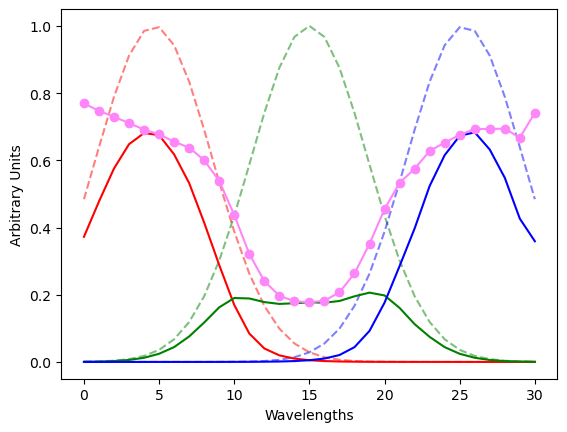

In [16]:
# %matplotlib inline
Ha.update_filters(None)# [[3,2], [7,2], [11,2]]
Ha.plot_filt(880,900)
plt.show()

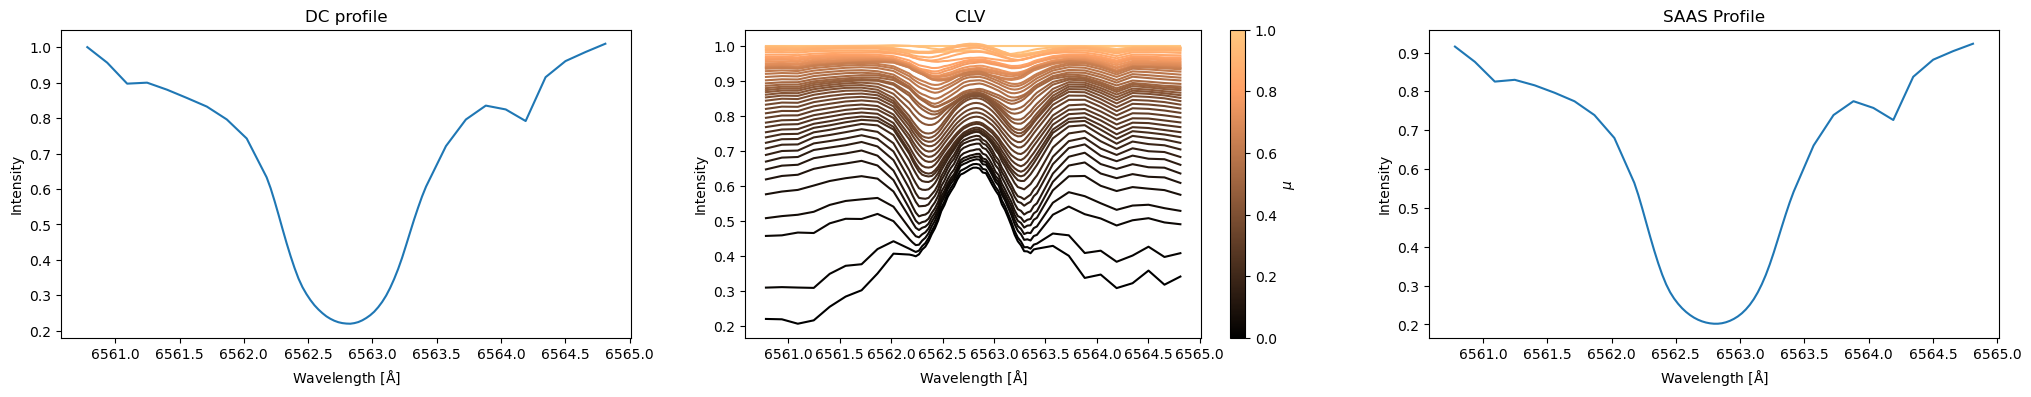

6562.797056366136 6562.797056366135


In [17]:
reload(un)
theor_Ha = un.linestudier('E:/solar flares/data/2017-09-06/fits/6563_clv.fits', atlas=None, nr=101)
print(np.median(theor_Ha.sst_wav), np.mean(theor_Ha.sst_wav))

## Calculating the $\mu$ !!!!! 


In [18]:
Ha.shape

(120, '??', 31, 1283, 1278)

In [19]:
def add_enters(s, length_row):
    n = 0
    while n+length_row <len(s):
        n += length_row
        s = s[:n] +'\n' + s[n:]
        n += 2
    return s


In [20]:
xy = pos
xy, np.shape(xy)

((-180.38424619869008, -203.16429455784942), (2,))

[-212.7155462  -148.0529462  -235.49559456 -170.83299456]


does MU contain nan's? False
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.958915560003897 for timeframe 60
Coundourplot succesfully saved.


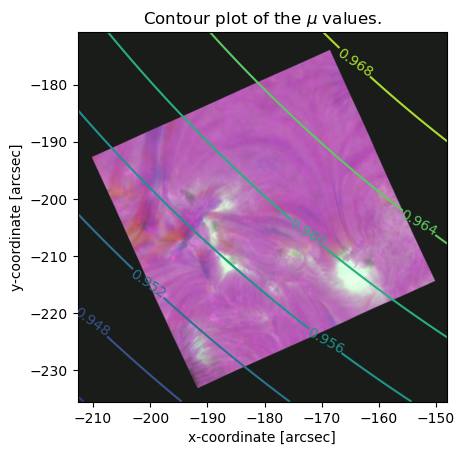

In [21]:
def calculate_mu(x,y, radius=959.63):
    # sourcery skip: inline-immediately-returned-variable
    '''
    Calculates mu given x,y in arseconds the radius of the celestial object is option. 
    The value of the sun is 959.63 arcsec

    mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
    a spot at the celestial objec.
    x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
    of the celestial object.
    '''
    mu  = (1-(x**2 + y**2)/radius**2)**0.5
    return mu

x,y = pos
width = 64.6626


fxp = [x - width /2, x + width /2]
fyp = [y - width /2, y + width /2]
fxp = np.concatenate((fxp, fyp))
print(fxp)

x = np.linspace(fxp[0], fxp[1], Ha.shape[4])
y = np.linspace(fyp[0], fyp[1], Ha.shape[3])

xx, yy = np.meshgrid(x, y)
xx0=xx
yy0=yy

MU = calculate_mu(xx,yy)
print("does MU contain nan's?", np.any(np.isnan(MU)))


reload(un)

def set_mu(sst_data, mu):
    sst_data.mu = mu

def fix_mu_theor(mu, theor_line):
    x = np.abs(theor_line.sst_mu-mu)
    index_mu = np.where(x == np.min(x))[0]
    theor_line.index_mu = index_mu
    theor_line.best_fit_clv = clv_fit(mu, theor_line)


def clv_fit(mu, theor_line):
    try:
        return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)
    except ValueError:
        x = np.abs(theor_line.sst_mu - mu)
        ind = np.where(x == np.min(x))[0]
        return theor_line.sst_clv[ind]




def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None, save=False, save_name=""):
    '''
    Creates a contourplot of the mu values
    if over is not None but a sst_data class object then the countour plot is shown over the specific frame
    '''
    if over is not None:
        shape=np.shape(over.datacube)[3:5]

    fig, ax = plt.subplots()
    if over is not None:
        over.ccp_frame(timeFrame, False)
        ax.imshow(Image.fromarray(over.current_ccp), origin='lower', extent=extent)
        B = over.boundary
        B = np.where(B == 1, 1, np.nan)
        K = MU * B
        av_mu = np.nanmean(K)
        print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
    CS = ax.contour(X, Y, MU)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title(r'Contour plot of the $\mu$ values.')
    ax.set_xlabel('x-coordinate [arcsec]')
    ax.set_ylabel('y-coordinate [arcsec]')

        
    if save:
        # Save arrays together
        np.savez(f"line_data/contourdata{save_name}.npz", MU, X[0], Y[:,0], over.current_ccp)
        print("Coundourplot succesfully saved.")
        
    if over is not None:
        return av_mu
 
mu = give_mu_contourplot(MU, xx, yy, fxp, over=Ha, save=True, save_name=Ha.name_of_line, timeFrame=maximum//2)
sst_data = Ha
theor_line = theor_Ha
set_mu(Ha, mu)
fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[theor_Ha.index_mu], theor_line.sst_clv[theor_Ha.index_mu][0], clv_fit(mu, theor_line)


(129, 128) (129, 128) (128, 127)


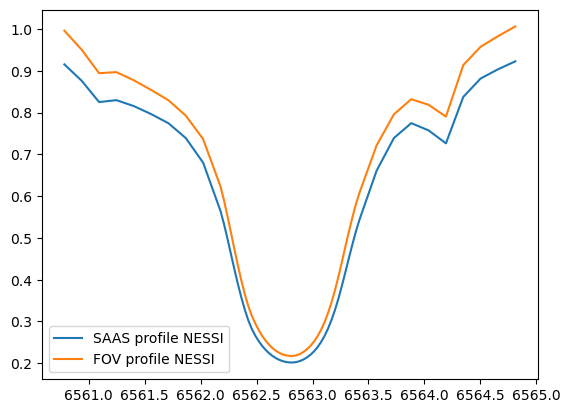

In [22]:
theor_Ha.set_fov( xx, yy, Ha.boundary, sr=959.63, reduction=10)



## Finding a suitable quiet sun patch

<>:41: SyntaxWarning: invalid escape sequence '\C'
<>:41: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_18344\2059040466.py:41: SyntaxWarning: invalid escape sequence '\C'
  fig.savefig(f'plots\Choosing_quiet_sun_patch_Ha.png')


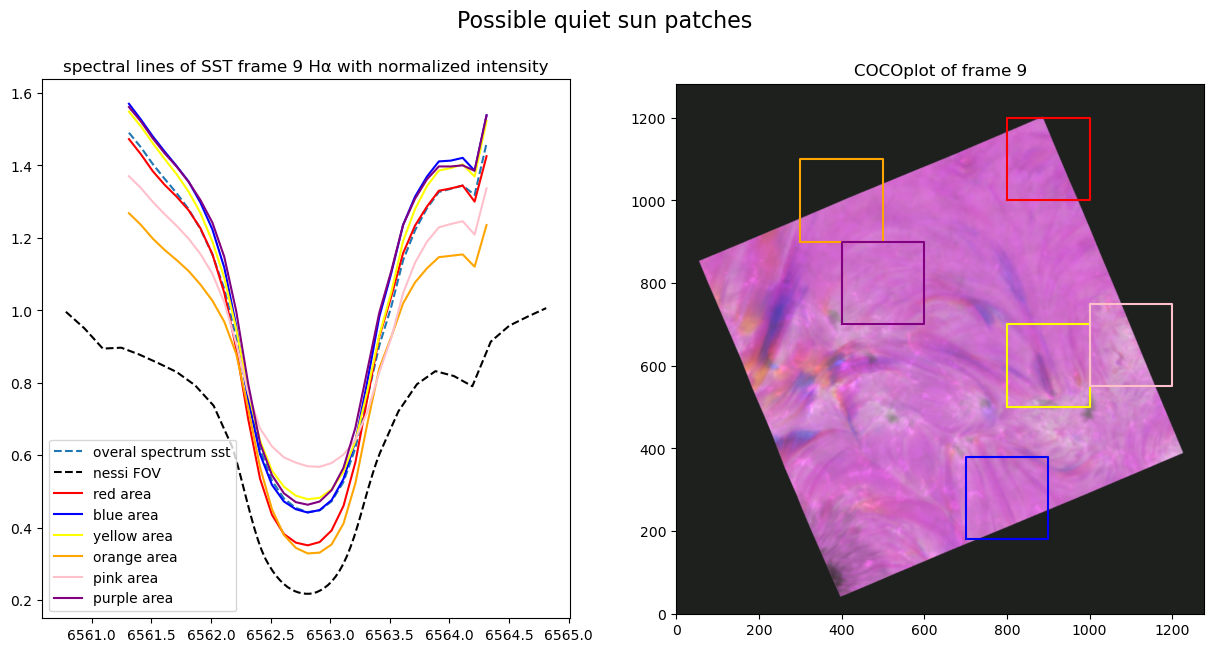

In [23]:
frame=9

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# fig.setitle("quiet sun determination, weiging constants")

fig.suptitle('Possible quiet sun patches', fontsize=16)

Ha.ccp_frame(frame,Show=False)
# xlim, ylim
X = [[(800,1000),(1000,1200)],[(700,900),(180, 380)], [(800,1000),(500,700)], [(300,500), (900, 1100)],  [(1000,1200),(550,750)], [(400,600),(700, 900)]]
    #  [(90,350), (800,969)] , [(90,290), (870,969)] ]# max x: 963, y: 969
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1 with normalized intensity")
Ha.frame_integrated_spect(frame)
ax[0].plot(Ha._wavel, Ha.av_spect, '--', label='overal spectrum sst')
# ax[0].plot(theor_Ha.sst_wav + theta[0], theta[2] * theor_Hast_dc + theta[1], label='saas nessi')
# theta = [ 2.196e-01 , 6.288e-02 , 8.458e-01]
theta = [0,0,1]


ax[0].plot(theor_Ha.sst_wav + theta[0], theta[2] * theor_Ha.spectr_fov, '--', label='nessi FOV', color='black')

ax[1].imshow(Ha.current_ccp,origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
t=0
for i in X:
    xlim=i[0]
    ylim=i[1]
    if t<len(colors):
        color=colors[t]
    else:
        color = np.array(np.random.choice(range(256), size=3))/255
    t+=1
    ax[0].plot(Ha._wavel, Ha.frame_integrated_spect(frame, xlim=xlim, ylim=ylim), color=color, label=str(color)+' area') #
    ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)
ax[0].legend()

# Save the figure
fig.savefig(f'plots\Choosing_quiet_sun_patch_Ha.png')
plt.show()


### The quiet sun patch

fill in here which color the wanted quiet sun patch had 

In [24]:
color_wanted_patch = 'red'

the edges of the patch are denoted by the xlim: (800, 1000) and ylim: (1000, 1200)


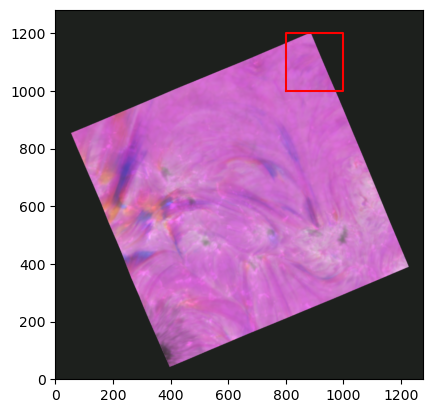

{'frame': 9, 'xlim': (800, 1000), 'ylim': (1000, 1200), 'color': 'red'}

In [25]:
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

Ha.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)
Ha.quiet_sun

The quiet sun is pick at x (-167.1681627217911, -180.03808387142192) with average              mu 0.9666725822371736


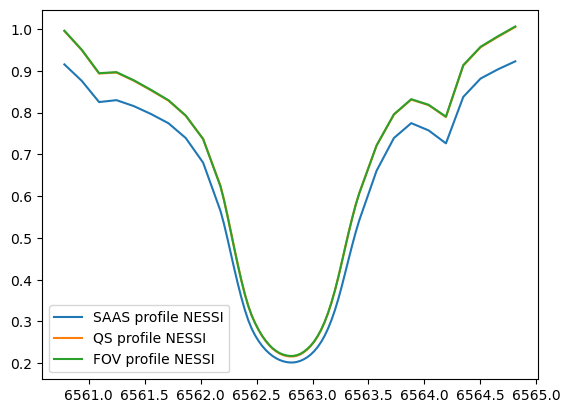

In [26]:
theor_Ha.set_quiet_sun(xlim=xlim, ylim=ylim)


[6561.31120982 6561.41120982 6561.51120982 6561.61120982 6561.71120982
 6561.81120982 6561.91120982 6562.01120982 6562.11120982 6562.21120982
 6562.31120982 6562.41120982 6562.51120982 6562.61120982 6562.71120982
 6562.81120982 6562.91120982 6563.01120982 6563.11120982 6563.21120982
 6563.31120982 6563.41120982 6563.51120982 6563.61120982 6563.71120982
 6563.81120982 6563.91120982 6564.01120982 6564.11120982 6564.21120982
 6564.31120982] [1.4726009  1.43083496 1.38399643 1.34614113 1.31359969 1.27643906
 1.22629069 1.15500082 1.04806467 0.89473124 0.70054007 0.53501132
 0.43537736 0.38241507 0.35867984 0.35120786 0.360272   0.39216417
 0.46010732 0.58076531 0.75624509 0.92695903 1.0370411  1.15772395
 1.23361784 1.28636573 1.32996457 1.33628572 1.34427998 1.29995372
 1.42524329] [0.88769232 0.87488619 0.85996217 0.84455956 0.82875178 0.8052753
 0.7764119  0.74081779 0.67248654 0.58856644 0.4626566  0.35077368
 0.28314873 0.24354364 0.22258228 0.21624721 0.22462156 0.25026188
 0.3004534

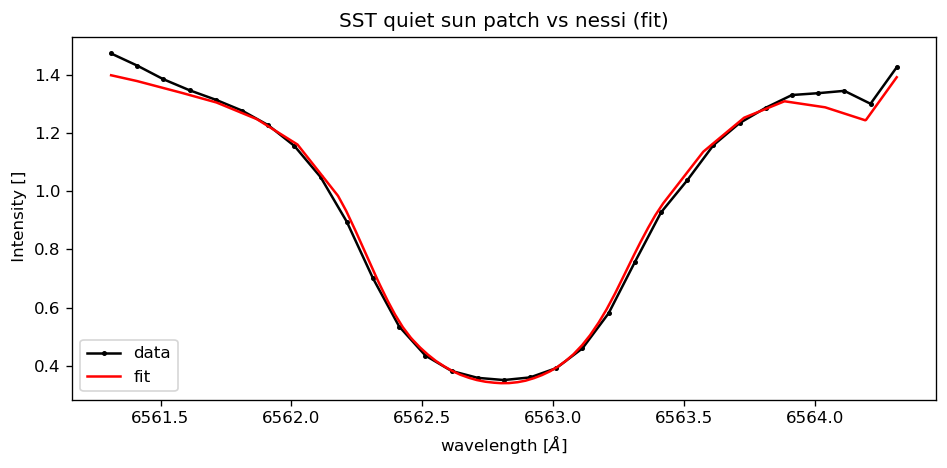

de p-waarde is  0.9999999999425302 
Chi^2 reduced= 2.6726417539883935 
aantal vrijheidgraden= 29 
chi^2= 77.50661086566342
we behouden de fit tot op een betrouwbaarheidsniveau van  0.9999999999425302 
Oftewel verwerp als p-waarde <lpha-niveau 


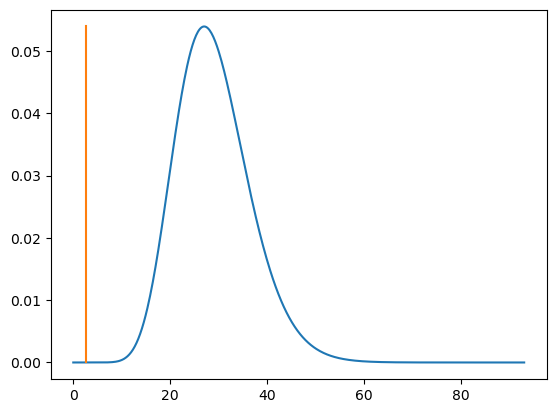

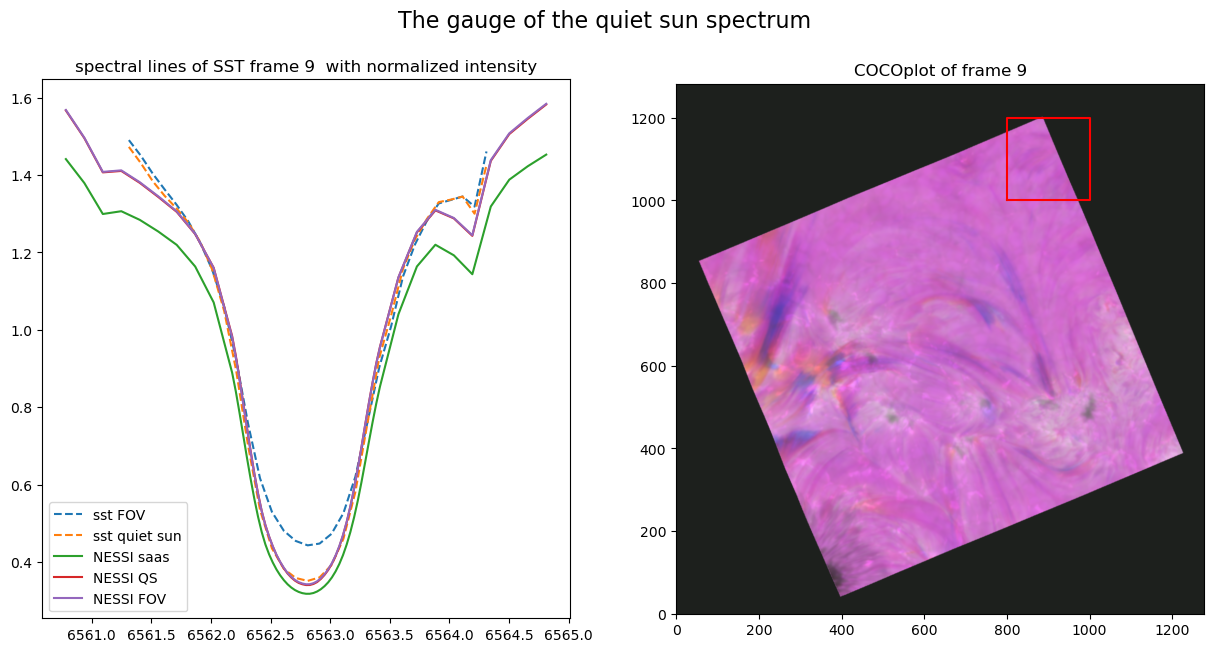

In [27]:
reload(un)
un.fit_qs_to_NESSI(theor_Ha, Ha)

Here it seems that there is that the altlas is horizontally elongated compared to the data. Maybe its important to remark this!

--------------------------------------------------------------------------------------------------
tot hier

## The full FOV integrated spectrum over time:

In [28]:
sst_data = Ha
Ha.shape

(120, '??', 31, 1283, 1278)

In [29]:
Ha.calculate__FOV_spect_over_time()

In [30]:
sst_data.quiet_sun

{'frame': 9, 'xlim': (800, 1000), 'ylim': (1000, 1200), 'color': 'red'}

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

The peak occurs at frame [46] at time ['t=08:07:55 UT'].
The SST data runs from t=07:37:02 UT to t=08:56:57 UT.
The areafactor for THIS flare is 0.0007039552304392861 compared to 60**2/np.pi/959.63**2 = 0.0012443569999152702.        
However normaly this should be alike and since the gauge is bij the Quiet sun, the conversion should be oké.        
Percentage: 56.57%.


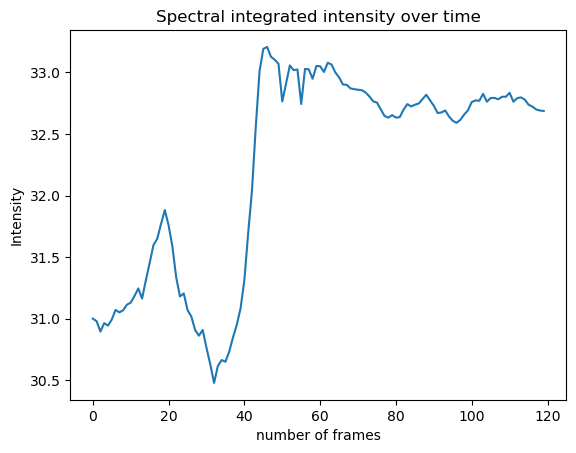

In [31]:
reload(un)
un.save_for_further_analysis(Ha, theor_Ha)


In [32]:
sst_data.TIME

array([-22.96666667, -22.3       , -21.63333333, -20.96666667,
       -20.28333333, -19.61666667, -18.95      , -18.26666667,
       -17.6       , -16.93333333, -16.26666667, -15.58333333,
       -14.91666667, -14.25      , -13.58333333, -12.9       ,
       -12.23333333, -11.56666667, -10.88333333, -10.21666667,
        -9.55      ,  -8.88333333,  -8.2       ,  -7.53333333,
        -6.86666667,  -6.18333333,  -5.51666667,  -4.85      ,
        -4.18333333,  -3.5       ,  -2.83333333,  -2.16666667,
        -1.48333333,  -0.81666667,  -0.15      ,   0.53333333,
         1.2       ,   1.86666667,   2.53333333,   3.21666667,
         3.88333333,   4.55      ,   5.23333333,   5.9       ,
         6.56666667,   7.23333333,   7.91666667,   8.58333333,
         9.25      ,   9.93333333,  10.6       ,  11.26666667,
        11.95      ,  12.61666667,  13.28333333,  13.95      ,
        14.63333333,  15.31666667,  15.98333333,  16.65      ,
        17.31666667,  18.        ,  18.66666667,  19.33

# Movie Making

In [33]:
# fill in here all arguments
theor_line = theor_Ha
sst_data = Ha
name_of_flare = "C2.4"
name_of_line = "Ha"

un.Movie_making(theor_line, sst_data, name_of_flare, name_of_line, step=1, show_boundary=False)

The filename E:/solar flares/data/animations/C24_Ha_animation.mp4 already exist
